importing the request libaries

In [6]:
import jax
import jax.numpy as jnp
from jax import grad, random
import matplotlib.pyplot as plt

[2285895361 1501764800] [1518642379 4090693311]
Epoch 0, Loss: 16.48948097229004
Epoch 100, Loss: 6.975699424743652
Epoch 200, Loss: 0.803594708442688
Epoch 300, Loss: 0.1405828297138214
Epoch 400, Loss: 0.04395536705851555
Epoch 500, Loss: 0.021026697009801865
Epoch 600, Loss: 0.013989346101880074
Epoch 700, Loss: 0.011158399283885956
Epoch 800, Loss: 0.009862066246569157
Epoch 900, Loss: 0.009217103943228722


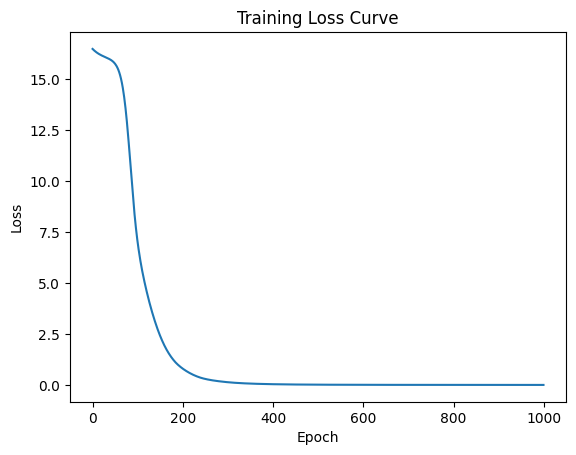

Predictions: [[0.85707045]]
(1, 2)


In [12]:


# Define the two-layer neural network
def two_layer_nn(params, x):
    W1, b1, W2, b2 = params
    h = jax.nn.relu(jnp.dot(x, W1) + b1)  # Hidden layer with ReLU activation
    output = jnp.dot(h, W2) + b2  # Output layer
    # print(output.shape)
    return output

# Define the mean squared error loss
def mse_loss(params, x, y):
    preds = two_layer_nn(params, x)
    return jnp.mean((preds - y) ** 2)

# Initialize the network parameters
def init_params(key, input_size, hidden_size, output_size):
    k1, k2, k3, k4 = random.split(key, 4)
    print(k1,k2)
    W1 = random.normal(k1, (input_size, hidden_size)) * 0.01
    b1 = jnp.zeros(hidden_size)
    W2 = random.normal(k2, (hidden_size, output_size)) * 0.01
    b2 = jnp.zeros(output_size)
    return [W1, b1, W2, b2]

# Generate synthetic data
key = random.PRNGKey(0)
x = random.normal(key, (100, 2))  # 100 samples, 2 input features
true_params = [jnp.array([[2.0, -1.0], [1.0, 3.0]]),  # W1
               jnp.array([0.5, -0.5]),               # b1
               jnp.array([[1.5], [-2.0]]),           # W2
               jnp.array([0.1])]                     # b2
y = two_layer_nn(true_params, x) + 0.1 * random.normal(key, (100, 1))  # Add noise

# Training the model
learning_rate = 0.01
hidden_size = 10
params = init_params(key, input_size=2, hidden_size=hidden_size, output_size=1)

@jax.jit
def train_step(params, x, y):
    grads = grad(mse_loss)(params, x, y)
    return [p - learning_rate * g for p, g in zip(params, grads)]

# Train the network
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    params = train_step(params, x, y)
    loss = mse_loss(params, x, y)
    losses.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plot the loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# Test the network on new data
test_x = jnp.array([[0.5, -1.0]])
preds = two_layer_nn(params, test_x)
print("Predictions:", preds)
print(test_x.shape)


In [ ]:
import numpy as np
import jax 
import jax.numpy as jnp
import matplotlib.pyplot as plt

 

In [24]:
# Step 1. Create a model (Feedforward Neural Network)
# Three-layer fully connected neural network with 100 nodes in each layer
n_nodes = 100
n_out = 1
def three_layer_nn(params, x):
    w1, b1, w2, b2, w3, b3 = params
    h1 = jax.nn.tanh(jnp.dot(x, w1) + b1)
    h2 = jax.nn.tanh(jnp.dot(h1, w2) + b2)
    output = jnp.dot(h2, w3) + b3
    return output
    


    
    